# KNMI Drougt Indices

In [1]:
import hydropandas as hpd
import pandas as pd

from spei import knmi

/home/martin/repos/SPEI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
stn = 260
startdate = pd.Timestamp("1995-01-01")
enddate = pd.Timestamp("2024-12-31")
# Load the data
prec = hpd.PrecipitationObs.from_knmi(
    meteo_var="RH", stn=stn, startdate=startdate, enddate=enddate
)["RH"].multiply(1e3)
prec.index = prec.index.normalize()
evap = hpd.EvaporationObs.from_knmi(
    meteo_var="EV24", stn=stn, startdate=startdate, enddate=enddate
)["EV24"].multiply(1e3)
evap.index = evap.index.normalize()
temp = hpd.MeteoObs.from_knmi(
    meteo_var="TG", stn=stn, startdate=startdate, enddate=enddate
)["TG"]
temp.index = temp.index.normalize()
deficit = evap - prec

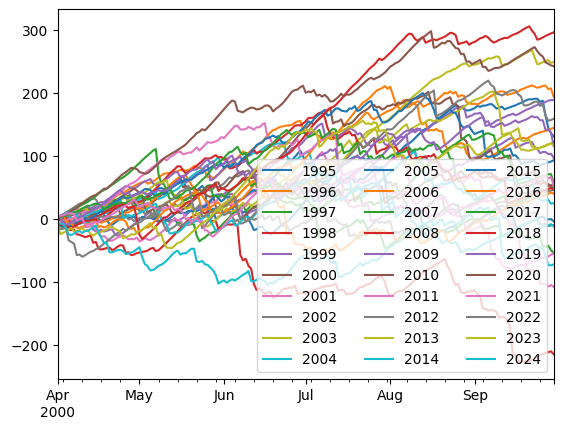

In [3]:
startdate = pd.Timestamp("2000-04-01")
enddate = pd.Timestamp("2000-09-30")
cumdf = knmi.get_cumulative_deficit(
    deficit=deficit, startdate=startdate, enddate=enddate
)
ax = cumdf.plot()
ax.legend(ncol=3)

In [4]:
knmi.deficit_oct1(deficit).to_frame().transpose()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
2000-09-30,131.3,193.5,50.9,-214.1,97.4,53.7,-107.4,47.1,249.1,25.6,...,93.6,40.4,56.6,296.4,115.8,242.6,53.0,159.3,117.0,-71.6


In [5]:
knmi.deficit_max(deficit).to_frame().transpose()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,191.1,212.2,108.0,11.7,134.0,76.5,106.5,77.4,268.5,122.2,...,200.1,60.5,143.4,306.0,163.6,298.2,92.2,219.8,156.0,19.4


In [6]:
knmi.deficit_apr1(deficit).to_frame().transpose()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,215.9,213.1,143.1,238.6,160.3,76.8,213.9,75.4,283.5,129.2,...,212.9,119.6,142.8,337.4,172.1,295.7,119.8,279.3,201.8,123.8


In [7]:
knmi.deficit_gdd(deficit, temp).to_frame().transpose()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,179.7,152.3,100.7,21.6,137.7,75.9,118.8,77.8,260.2,119.5,...,211.3,61.2,145.6,311.9,178.2,293.0,85.9,254.3,135.5,1.0


In [8]:
knmi.deficit_wet(deficit).to_frame().transpose()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,-4.2,181.6,43.6,-2.7,0.5,0.0,0.3,2.2,212.0,0.1,...,33.4,-1.1,9.8,172.7,0.3,87.9,-2.6,109.1,-21.1,-2.6
